# Phishing URL Detection

Phishing attacks have become a pervasive threat in the digital landscape, exploiting the trust that users have in various online services and websites. In this project, we aim to develop a binary classification model that distinguishes between phishing websites (labelled as '1') and legitimate websites (labelled as '-1'). We will leverage Python's Scikit-Learn library, a powerful tool for machine learning, to build and evaluate our model.

## 1- Importing required librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 2- Getting and Processing Data

In [2]:
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [3]:
data.shape

(11054, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

- Index: A unique identifier for each sample. 
- UsingIP: Indicates the presence of an IP address in the URL (binary: 1 for yes, 0 for no).
- LongURL: Indicates URL length (binary: 1 for long, 0 for short).
- ShortURL: Indicates URL length (binary: 1 for short, 0 for long).
- Symbol@: Reflects the presence of the '@' symbol in the URL (binary).
- Redirecting//: Indicates the presence of '//' symbols in the URL (binary).
- PrefixSuffix-: Shows the presence of prefix or suffix hyphens in the URL (binary).
- SubDomains: Quantifies the number of subdomains in the URL (integer).
- HTTPS: Indicates the use of HTTPS in the URL (binary).
- DomainRegLen: Reflects the length of domain registration (integer).
- Favicon: Indicates the presence of a favicon on the website (binary).
- NonStdPort: Indicates the use of a non-standard port in the URL (binary).
- HTTPSDomainURL: Reflects the use of HTTPS in both the domain and URL (binary).
- RequestURL: Indicates if the URL contains a request (binary).
- AnchorURL: Indicates if the URL contains an anchor (binary).
- LinksInScriptTags: Quantifies the number of links in script tags (integer).
- ServerFormHandler: Indicates the presence of a server form handler (binary).
- InfoEmail: Indicates the presence of an email in the URL (binary).
- AbnormalURL: Indicates whether the URL is considered abnormal (binary).
- WebsiteForwarding: Indicates website forwarding (binary).
- StatusBarCust: Indicates the presence of a custom status bar (binary).
- DisableRightClick: Indicates whether right-click functionality is disabled (binary).
- UsingPopupWindow: Indicates the use of popup windows (binary).
- IframeRedirection: Indicates whether the URL uses iframe redirection (binary).
- AgeofDomain: Indicates the age of the domain in months (integer).
- DNSRecording: Indicates DNS recording (binary).
- WebsiteTraffic: Estimates website traffic (integer).
- PageRank: Represents Google PageRank (integer).
- GoogleIndex: Indicates Google's index status (binary).
- LinksPointingToPage: Quantifies the number of external links pointing to the page (integer).
- StatsReport: Indicates the presence of a stats report (binary).
- Class: The target variable, distinguishing phishing websites (1) from legitimate websites (-1).

In [5]:
data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [6]:
data.describe()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
count,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,...,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000,11054.000000
mean,5526.500000,0.313914,-0.633345,0.738737,0.700561,0.741632,-0.734938,0.064049,0.251040,-0.336711,...,0.613353,0.816899,0.061335,0.377239,0.287407,-0.483626,0.721549,0.343948,0.719739,0.113986
std,3191.159272,0.949495,0.765973,0.674024,0.713625,0.670837,0.678165,0.817492,0.911856,0.941651,...,0.789845,0.576807,0.998162,0.926158,0.827680,0.875314,0.692395,0.569936,0.694276,0.993527
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2763.250000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5526.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8289.750000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11053.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,11054.0,5526.500000,3191.159272,0.0,2763.25,5526.5,8289.75,11053.0
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.00,1.0,1.00,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.00,-1.0,-1.00,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.00,1.0,1.00,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.00,1.0,1.00,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.00,1.0,1.00,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.00,-1.0,-1.00,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.00,0.0,1.00,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.00,1.0,1.00,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.00,-1.0,1.00,1.0


In [8]:
data.isnull().sum()

Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

In [9]:
data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

The dataset's key characteristics:

1. The dataset comprises 11,054 instances with 31 features.
2. Among these features, 30 are independent variables, and 1 is the dependent variable.
3. All features are of integer data type, eliminating the need for label encoding or data type conversion.
4. Notably, the dataset is free from any outliers, ensuring the integrity of the data.
5. Furthermore, there are no missing values within the dataset, signifying complete and clean data for analysis and modeling.

### Data Vizualization 

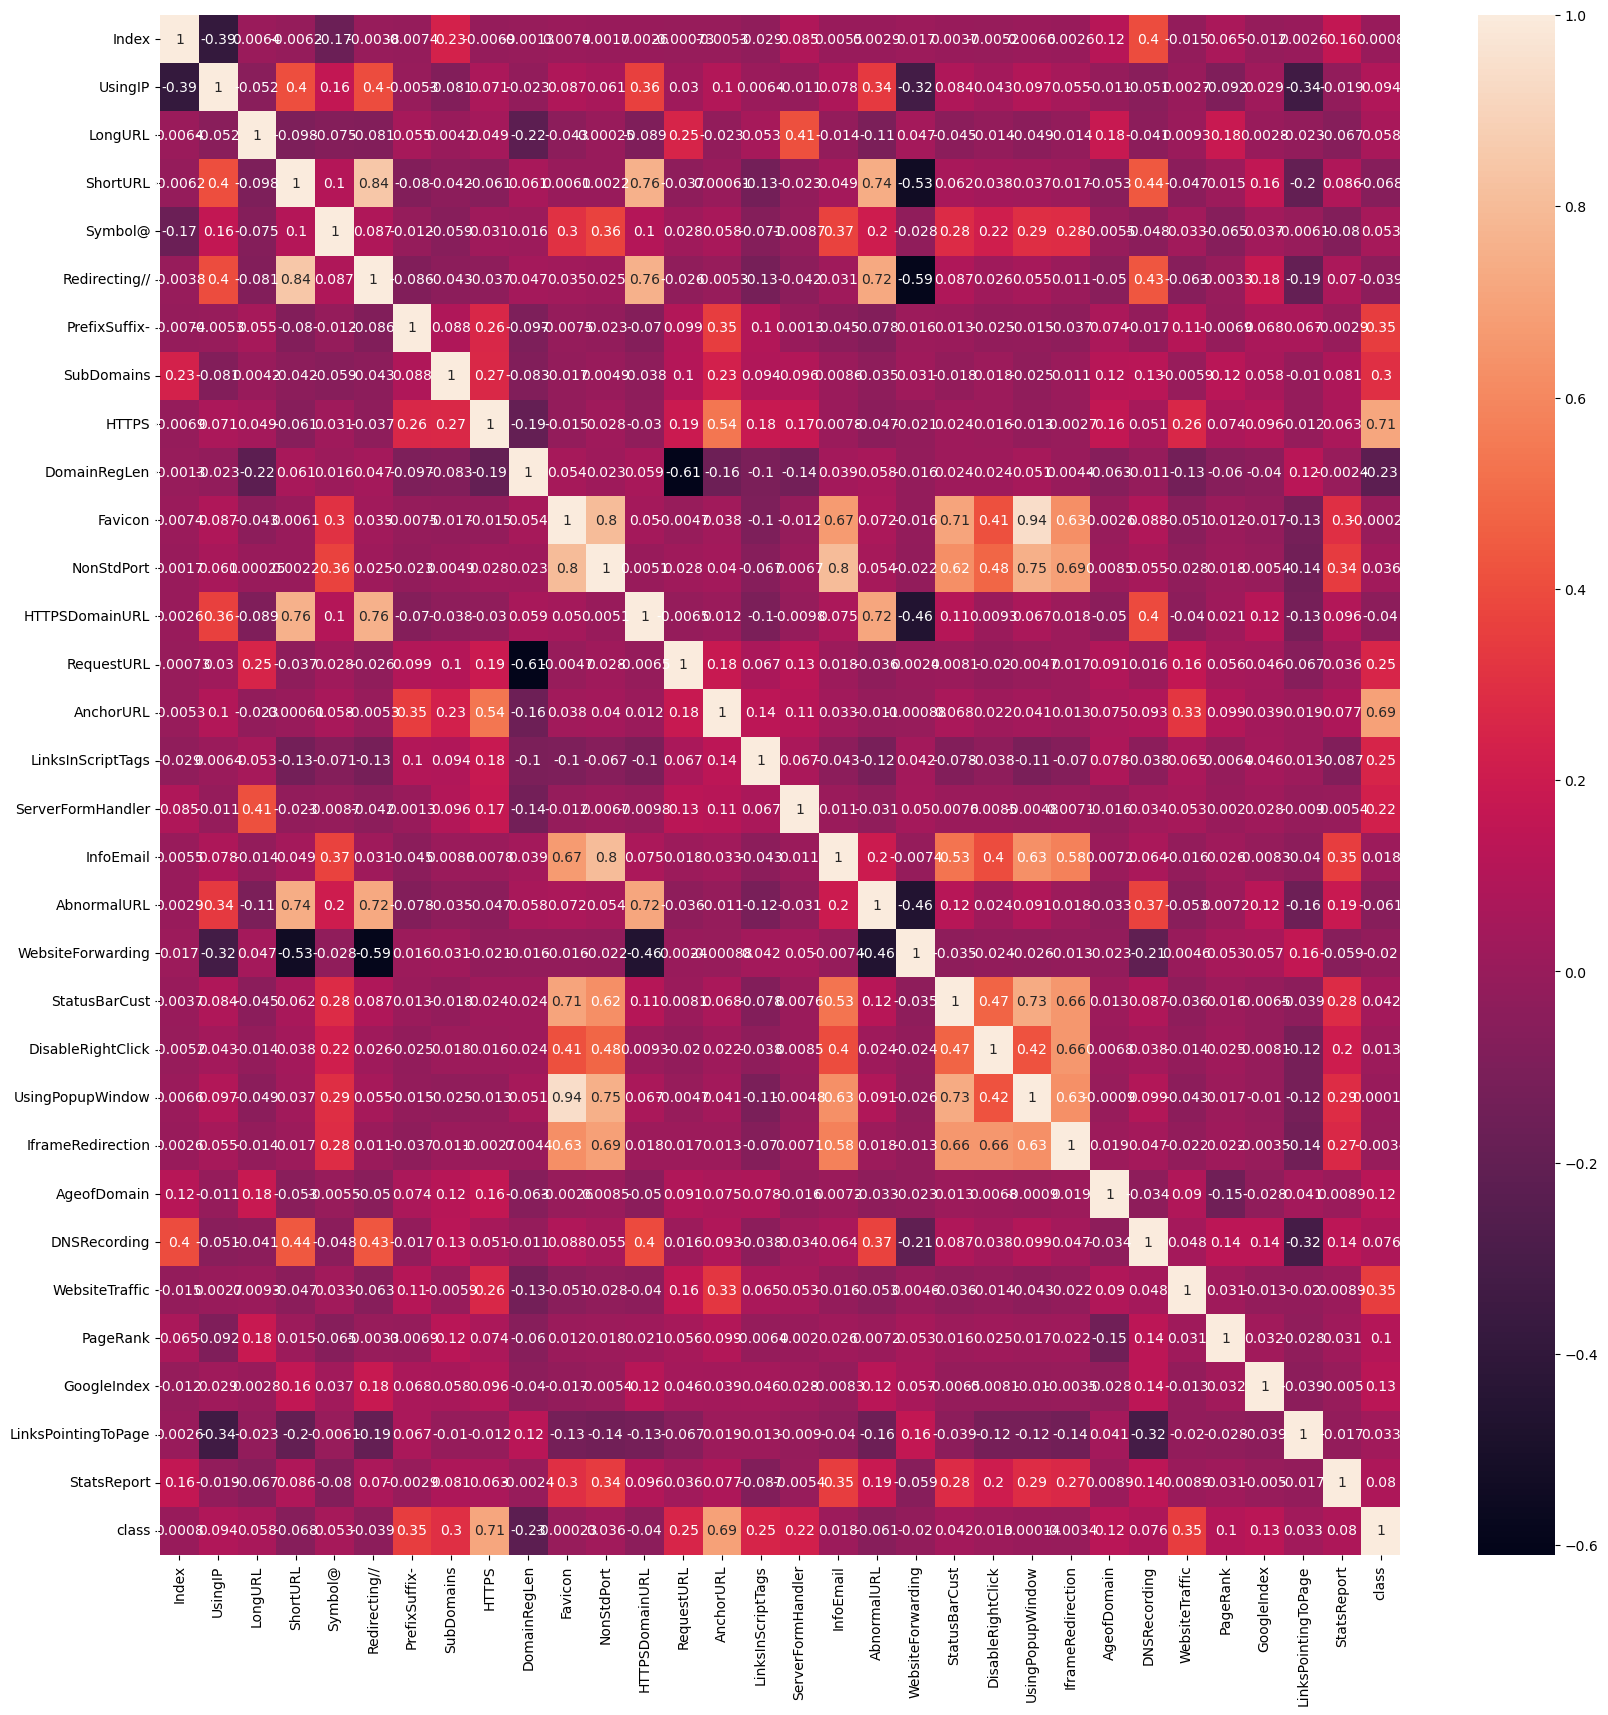

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

This command generates a heatmap using Seaborn to visualize the correlation between different features in our dataset:
- Each square in the heatmap represents a pair of features, and its color reflects the strength of their correlation.
- Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values near 0 show little to no correlation.

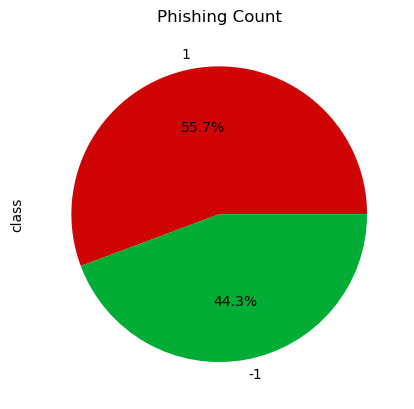

In [11]:
colors = ['#cf0404', '#02ad35']
data['class'].value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%')
plt.title("Phishing Count")
plt.show()

This pie chart visually represents the distribution of phishing and legitimate websites in the dataset, showing the proportion of each class as a percentage of the total. It provides an at-a-glance understanding of the dataset's class balance.

## 3- Creating Model

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(["class"],axis =1)
y = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #train and test sets: 80-20 split
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 31), (8843,), (2211, 31), (2211,))

### Naive Bayes Classifier

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
nb=  GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [14]:
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [15]:
acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

Naive Bayes Classifier : Accuracy on training Data: 0.884
Naive Bayes Classifier : Accuracy on test Data: 0.885



In [16]:
f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

Naive Bayes Classifier : f1_score on training Data: 0.890
Naive Bayes Classifier : f1_score on test Data: 0.890



In [17]:
recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

Naive Bayes Classifier : Recall on training Data: 0.839
Naive Bayes Classifier : Recall on test Data: 0.838



In [18]:
precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : precision on training Data: 0.946
Naive Bayes Classifier : precision on test Data: 0.950


In [19]:
print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

          -1       0.82      0.94      0.88       976
           1       0.95      0.84      0.89      1235

    accuracy                           0.88      2211
   macro avg       0.89      0.89      0.88      2211
weighted avg       0.89      0.88      0.89      2211



In [64]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

def results(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 5))
    f1_score.append(round(b, 5))
    recall.append(round(c, 5))
    precision.append(round(d, 5))

In [65]:
results('Naive Bayes',acc_test_nb,f1_score_test_nb,
             recall_score_test_nb,precision_score_test_nb)

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [24]:
y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [25]:
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))

Logistic Regression : Accuracy on training Data: 0.918
Logistic Regression : Accuracy on test Data: 0.926


In [26]:
f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))

Logistic Regression : f1_score on training Data: 0.927
Logistic Regression : f1_score on test Data: 0.934


In [27]:
recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))

Logistic Regression : Recall on training Data: 0.938
Logistic Regression : Recall on test Data: 0.941


In [28]:
precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : precision on training Data: 0.917
Logistic Regression : precision on test Data: 0.928


In [29]:
print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.92      0.91      0.92       976
           1       0.93      0.94      0.93      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.92      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [66]:
results('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_test_log,precision_score_test_log)

### K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [32]:
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("KNN: Accuracy on training data: {:.5f}".format(acc_train_knn))
print("KNN: Accuracy on test data: {:.5f}".format(acc_test_knn))

KNN: Accuracy on training data: 1.00000
KNN: Accuracy on test data: 0.67074


In [33]:
f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("KNN: f1_score on training Data: {:.5f}".format(f1_score_train_knn))
print("KNN: f1_score on test Data: {:.5f}".format(f1_score_test_knn))

KNN: f1_score on training Data: 1.00000
KNN: f1_score on test Data: 0.69386


In [34]:
recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("KNN: Recall on training Data: {:.5f}".format(recall_score_train_knn))
print("KNN: Recall on test Data: {:.5f}".format(recall_score_test_knn))

KNN: Recall on training Data: 1.00000
KNN: Recall on test Data: 0.66802


In [35]:
precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("KNN: precision on training Data: {:.5f}".format(precision_score_train_knn))
print("KNN: precision on test Data: {:.5f}".format(precision_score_test_knn))

KNN: precision on training Data: 1.00000
KNN: precision on test Data: 0.72178


In [36]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.62      0.67      0.64       976
           1       0.72      0.67      0.69      1235

    accuracy                           0.67      2211
   macro avg       0.67      0.67      0.67      2211
weighted avg       0.68      0.67      0.67      2211



In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}  # Experiment with different values of n_neighbors
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_k = grid_search.best_params_['n_neighbors']

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

y_train_knn = knn.predict(X_train_scaled)
y_test_knn = knn.predict(X_test_scaled)

acc_train_knn = metrics.accuracy_score(y_train, y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test, y_test_knn)
print("K-Nearest Neighbors: Accuracy on training data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors: Accuracy on test data: {:.3f}".format(acc_test_knn))

K-Nearest Neighbors: Accuracy on training data: 0.981
K-Nearest Neighbors: Accuracy on test data: 0.947


In [38]:
f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("KNN: f1_score on training Data: {:.5f}".format(f1_score_train_knn))
print("KNN: f1_score on test Data: {:.5f}".format(f1_score_test_knn))

KNN: f1_score on training Data: 0.98320
KNN: f1_score on test Data: 0.95250


In [39]:
recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("KNN: Recall on training Data: {:.5f}".format(recall_score_train_knn))
print("KNN: Recall on test Data: {:.5f}".format(recall_score_test_knn))

KNN: Recall on training Data: 0.98679
KNN: Recall on test Data: 0.95789


In [40]:
precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("KNN: precision on training Data: {:.5f}".format(precision_score_train_knn))
print("KNN: precision on test Data: {:.5f}".format(precision_score_test_knn))

KNN: precision on training Data: 0.97963
KNN: precision on test Data: 0.94716


In [67]:
results('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_test_knn,precision_score_test_knn)

### SVM Classifier

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

# param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}
# svc = GridSearchCV(SVC(), param_grid)
# svc.fit(X_train, y_train)

In [ ]:
# y_train_svc = svc.predict(X_train)
# y_test_svc = svc.predict(X_test)

In [ ]:
# acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
# acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
# print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
# print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
# print()

In [ ]:
# f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
# f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
# print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
# print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
# print()

In [ ]:
# recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
# recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
# print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
# print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
# print()

In [ ]:
# precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
# precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
# print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
# print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

In [ ]:
# print(metrics.classification_report(y_test, y_test_svc))

In [ ]:
# results('Support Vector Machine',acc_test_svc,f1_score_test_svc,
#              recall_score_train_svc,precision_score_train_svc)

### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_train_dtree = dtree.predict(X_train)
y_test_dtree = dtree.predict(X_test)

acc_train_dtree = accuracy_score(y_train, y_train_dtree)
acc_test_dtree = accuracy_score(y_test, y_test_dtree)
print("Decision Tree Classifier: Accuracy on training Data: {:.5f}".format(acc_train_dtree))
print("Decision Tree Classifier: Accuracy on test Data: {:.5f}".format(acc_test_dtree))
print()

f1_score_train_dtree = f1_score(y_train, y_train_dtree)
f1_score_test_dtree = f1_score(y_test, y_test_dtree)
print("Decision Tree Classifier: F1 score on training Data: {:.5f}".format(f1_score_train_dtree))
print("Decision Tree Classifier: F1 score on test Data: {:.5f}".format(f1_score_test_dtree))
print()

recall_score_train_dtree = recall_score(y_train, y_train_dtree)
recall_score_test_dtree = recall_score(y_test, y_test_dtree)
print("Decision Tree Classifier: Recall on training Data: {:.5f}".format(recall_score_train_dtree))
print("Decision Tree Classifier: Recall on test Data: {:.5f}".format(recall_score_test_dtree))
print()

precision_score_train_dtree = precision_score(y_train, y_train_dtree)
precision_score_test_dtree = precision_score(y_test, y_test_dtree)
print("Decision Tree Classifier: Precision on training Data: {:.5f}".format(precision_score_train_dtree))
print("Decision Tree Classifier: Precision on test Data: {:.5f}".format(precision_score_test_dtree))

Decision Tree Classifier: Accuracy on training Data: 1.00000
Decision Tree Classifier: Accuracy on test Data: 0.95432

Decision Tree Classifier: F1 score on training Data: 1.00000
Decision Tree Classifier: F1 score on test Data: 0.95906

Decision Tree Classifier: Recall on training Data: 1.00000
Decision Tree Classifier: Recall on test Data: 0.95789

Decision Tree Classifier: Precision on training Data: 1.00000
Decision Tree Classifier: Precision on test Data: 0.96023


In [68]:
results('Decision Tree',acc_test_dtree,f1_score_test_dtree,
             recall_score_test_dtree,precision_score_test_dtree)

### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [49]:
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [50]:
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.998
Random Forest : Accuracy on test Data: 0.967

Random Forest : f1_score on training Data: 0.998
Random Forest : f1_score on test Data: 0.970

Random Forest : Recall on training Data: 0.997
Random Forest : Recall on test Data: 0.969

Random Forest : precision on training Data: 0.999
Random Forest : precision on test Data: 0.972


In [51]:
print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



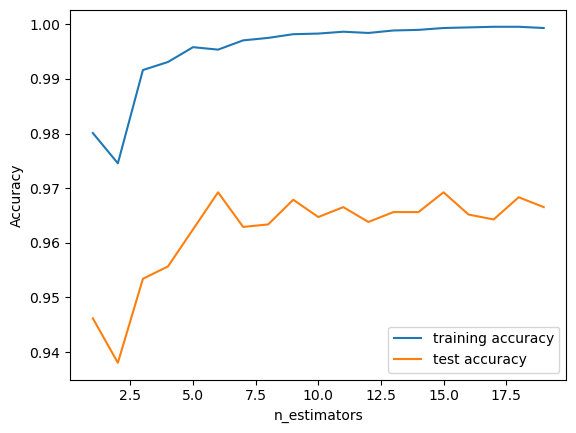

In [52]:
training_accuracy = []
test_accuracy = []
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    training_accuracy.append(forest_test.score(X_train, y_train))
    test_accuracy.append(forest_test.score(X_test, y_test))
    

plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [69]:
results('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_test_forest,precision_score_test_forest)

### Gradient Boosting Classifier Model

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [54]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [55]:
acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.5f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.5f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.5f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.5f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.5f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.5f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.5f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.5f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.99876
Gradient Boosting Classifier : Accuracy on test Data: 0.96156

Gradient Boosting Classifier : f1_score on training Data: 0.99888
Gradient Boosting Classifier : f1_score on test Data: 0.96560

Gradient Boosting Classifier : Recall on training Data: 0.99878
Gradient Boosting Classifier : Recall on test Data: 0.96599

Gradient Boosting Classifier : precision on training Data: 0.99898
Gradient Boosting Classifier : precision on test Data: 0.96521


In [56]:
print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       976
           1       0.97      0.97      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



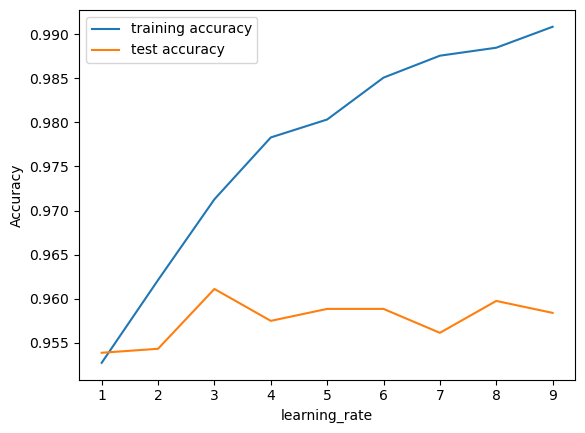

In [57]:
training_accuracy = []
test_accuracy = []
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    training_accuracy.append(forest_test.score(X_train, y_train))
    test_accuracy.append(forest_test.score(X_test, y_test))
    
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

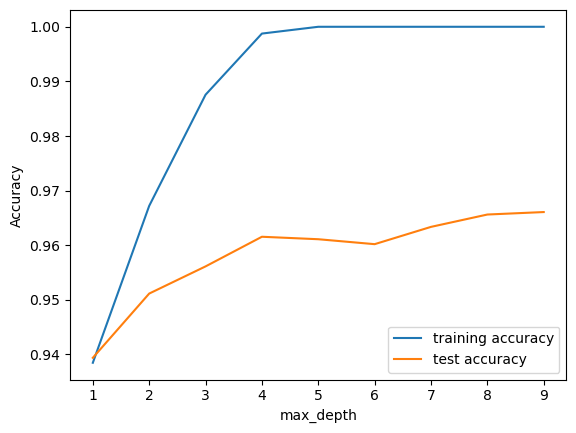

In [58]:
training_accuracy = []
test_accuracy = []
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    training_accuracy.append(forest_test.score(X_train, y_train))
    test_accuracy.append(forest_test.score(X_test, y_test))
    
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [59]:
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

def results(model, a, b, c, d):
    ML_Model.append(model)
    accuracy.append(round(a, 5))
    f1_score.append(round(b, 5))
    recall.append(round(c, 5))
    precision.append(round(d, 5))

In [70]:
results('Gradient Boosting Classifier', acc_test_gbc, f1_score_test_gbc, recall_score_test_gbc, precision_score_test_gbc)

### Multi-layer Perceptron

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp = MLPClassifier()

mlp.fit(X_train, y_train)

MLPClassifier()

In [61]:
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [62]:
acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.924
Multi-layer Perceptron : Accuracy on test Data: 0.930

Multi-layer Perceptron : f1_score on training Data: 0.932
Multi-layer Perceptron : f1_score on test Data: 0.932

Multi-layer Perceptron : Recall on training Data: 0.938
Multi-layer Perceptron : Recall on test Data: 0.944

Multi-layer Perceptron : precision on training Data: 0.927
Multi-layer Perceptron : precision on test Data: 0.932


In [71]:
results('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_test_mlp,precision_score_test_mlp)

### Ada Boost Classifier

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

y_train_adaboost = adaboost.predict(X_train)
y_test_adaboost = adaboost.predict(X_test)

acc_train_adaboost = accuracy_score(y_train, y_train_adaboost)
acc_test_adaboost = accuracy_score(y_test, y_test_adaboost)
print("AdaBoostClassifier: Accuracy on training Data: {:.3f}".format(acc_train_adaboost))
print("AdaBoostClassifier: Accuracy on test Data: {:.3f}".format(acc_test_adaboost))
print()

f1_score_train_adaboost = f1_score(y_train, y_train_adaboost)
f1_score_test_adaboost = f1_score(y_test, y_test_adaboost)
print("AdaBoostClassifier: F1 score on training Data: {:.3f}".format(f1_score_train_adaboost))
print("AdaBoostClassifier: F1 score on test Data: {:.3f}".format(f1_score_test_adaboost))
print()

recall_score_train_adaboost = recall_score(y_train, y_train_adaboost)
recall_score_test_adaboost = recall_score(y_test, y_test_adaboost)
print("AdaBoostClassifier: Recall on training Data: {:.3f}".format(recall_score_train_adaboost))
print("AdaBoostClassifier: Recall on test Data: {:.3f}".format(recall_score_test_adaboost))
print()

precision_score_train_adaboost = precision_score(y_train, y_train_adaboost)
precision_score_test_adaboost = precision_score(y_test, y_test_adaboost)
print("AdaBoostClassifier: Precision on training Data: {:.3f}".format(precision_score_train_adaboost))
print("AdaBoostClassifier: Precision on test Data: {:.3f}".format(precision_score_test_adaboost))

AdaBoostClassifier: Accuracy on training Data: 0.937
AdaBoostClassifier: Accuracy on test Data: 0.940

AdaBoostClassifier: F1 score on training Data: 0.944
AdaBoostClassifier: F1 score on test Data: 0.947

AdaBoostClassifier: Recall on training Data: 0.954
AdaBoostClassifier: Recall on test Data: 0.958

AdaBoostClassifier: Precision on training Data: 0.933
AdaBoostClassifier: Precision on test Data: 0.936


In [72]:
results('AdaBoost Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_test_nb,precision_score_test_nb)

## Comparing Models

In [73]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [74]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Naive Bayes,0.88467,0.89032,0.83806,0.94954
1,Logistic Regression,0.92628,0.93446,0.94089,0.92812
2,K-Nearest Neighbors,0.94663,0.95250,0.95789,0.94716
3,Decision Tree,0.95432,0.95906,0.95789,0.96023
4,Random Forest,0.96698,0.97041,0.96923,0.97159
5,Gradient Boosting Classifier,0.96156,0.96560,0.96599,0.96521
6,Multi-layer Perceptron,0.93035,0.93805,0.94413,0.93205
7,AdaBoost Classifier,0.88467,0.89032,0.83806,0.94954


In [75]:
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [76]:
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.96698,0.97041,0.96923,0.97159
1,Gradient Boosting Classifier,0.96156,0.96560,0.96599,0.96521
2,Decision Tree,0.95432,0.95906,0.95789,0.96023
3,K-Nearest Neighbors,0.94663,0.95250,0.95789,0.94716
4,Multi-layer Perceptron,0.93035,0.93805,0.94413,0.93205
5,Logistic Regression,0.92628,0.93446,0.94089,0.92812
6,Naive Bayes,0.88467,0.89032,0.83806,0.94954
7,AdaBoost Classifier,0.88467,0.89032,0.83806,0.94954


In [ ]:
import numpy as np

# Define the state, action, and reward spaces
state_space = data.drop(columns=['class']).values
action_space = [-1, 1]  # Legitimate, Phishing
n_actions = len(action_space)

# Initialize the Q-table
n_states = len(state_space)
Q = np.zeros((n_states, n_actions))

# Define a simple reward function (adjust as needed)
def get_reward(action, true_label):
    return 1 if action == true_label else -1

# Q-learning parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.2  # Exploration rate

# Q-learning training
for _ in range(1000):  # Adjust the number of episodes
    state = np.random.choice(n_states)  # Start from a random state
    done = False
    while not done:
        if np.random.rand() < epsilon:
            action = np.random.choice(n_actions)
        else:
            action = np.argmax(Q[state, :])
        
        # Simulate the environment (use your dataset to get the true labels)
        true_label = data.iloc[state]['class']
        next_state = np.random.choice(n_states)
        reward = get_reward(action_space[action], true_label)

        # Q-learning update
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
        
        state = next_state

# After training, you can use the Q-table to make predictions
best_action = np.argmax(Q[state, :])
